<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [317]:
#Importation de la librairie Pandas
import pandas as pd

In [319]:
#Importation de la librairie plotly express
import plotly.express as px


In [321]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
df_web = pd.read_excel("web.xlsx")

display(df_web.columns)


C:\Users\frjol\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning:

Unknown extension is not supported and will be removed



Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'product_type', 'post_title',
       'post_excerpt', 'post_status', 'comment_status', 'ping_status',
       'post_password', 'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [323]:


#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")


#import warnings
#warnings.simplefilter("ignore")



C:\Users\frjol\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\frjol\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\frjol\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning:

Unknown extension is not supported and will be removed



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [327]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [328]:
#Consulter le nombre de colonnes
print(df_erp.shape[1])
#La nature des données dans chacune des colonnes
print(df_erp.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()


6
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [332]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [334]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
pd.options.display.max_rows=2000
pd.options.display.max_columns=20

#df_erp.duplicated(['product_id'],keep=False)
df_erp.duplicated(['product_id'],keep=False).sum()
#NON = 0 

0

In [336]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp['stock_status'].unique()
#À quelle(s) autre(s) colonne(s) sont-elles liées ?

#stock_quantity


array(['instock', 'outofstock'], dtype=object)

In [338]:
#Création d'une colonne "stock_status_2
df_erp["stock_status_2"]=""
#print(df_erp)
for i in df_erp.index:
    if df_erp.loc[i,"stock_quantity"] <= 0:
        df_erp.loc[i,"stock_status_2"] = "outofstock"
    else:
        df_erp.loc[i,"stock_status_2"] = "instock"
            
#display(df_erp)
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"


In [340]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
display(df_erp["stock_status"] == df_erp["stock_status_2"])

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

In [352]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset 
# 825 ! 
df=df_erp["stock_status"] == df_erp["stock_status_2"]
df.sum()

825

In [354]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart 
#4
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_ecart=df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"], :]
display(df_ecart)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


In [356]:
#Corriger la ou les données incohérentes
df_erp.loc[(df_erp["product_id"] == 4039),"stock_status"]=df_erp.loc[(df_erp["product_id"] == 4039),"stock_status_2"]
df_erp.loc[(df_erp["product_id"] == 4885),"stock_status"]=df_erp.loc[(df_erp["product_id"] == 4885),"stock_status_2"]

#Verification en utilisant le même code que plus haut pour afficher les problemes
df_ecart=df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"], :]
display(df_ecart)


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [360]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

display(df_erp.loc[(df_erp["price"] <= 0) | (df_erp["price"].isnull()),:])

#Afficher le ou les prix non renseignés dans la colonne "price"
prix_NA=df_erp.loc[df_erp["price"].isnull(), "price"]

print("Nombre d'articles avec un prix non renseigné : {}".format(len(prix_NA))) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"

print("prix de vente minimum : {}".format(df_erp["price"].min()))

#Afficher le prix maximum de la colonne "price"

print("prix de vente maximum : {}".format(df_erp["price"].max()))

#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)

print(df_erp.loc[(df_erp["price"] <= 0), "price"])

# il faut les rendre positif 
df_erp.loc[(df_erp["price"] <= 0), "price"]=df_erp.loc[(df_erp["price"] <= 0),("price")].abs()
print(df_erp.loc[(df_erp["price"] <= 0), "price"])

# prix de vente est en géneral 2 fois le prix d'achat en comparant les autres => erreur de typo a remettre en valeur positive!


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


Nombre d'articles avec un prix non renseigné : 0
prix de vente minimum : 5.2
prix de vente maximum : 225.0
Series([], Name: price, dtype: float64)
Series([], Name: price, dtype: float64)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [363]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"

print("quantité minimum : {}".format(df_erp["stock_quantity"].min()))

#Afficher la quantité maximum de la colonne "stock_quantity"

print("quantité maximum : {}".format(df_erp["stock_quantity"].max()))

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)

print(df_erp.loc[(df_erp["stock_quantity"] < 0), :])

# il faut les mettre à 0 => Un stock négatif n’existe pas 
df_erp.loc[(df_erp["stock_quantity"] < 0), "stock_quantity"]=0

print(df_erp.loc[(df_erp["stock_quantity"] < 0), "stock_quantity"])

#verifie 1 sans vente WEB et autre avec 8 vente (14736)  => meilleur solution remettre a 0 => QUAND out of stock! 
# 	    4973  -10
#14736	5700  -1



quantité minimum : -10
quantité maximum : 145
     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock  
Series([], Name: stock_quantity, dtype: int64)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [366]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
display(df_erp['onsale_web'].tail(20))
df_erp['onsale_web'].info()
print(df_erp['onsale_web'].sum())
df_erp['onsale_web'].describe()

# 716 vendu sur le web / 825

#=> si le produit est vendu en ligne ou pas => problème de Type  / devrait etre un boolean (0 ou 1) 


805    0
806    0
807    0
808    0
809    0
810    0
811    0
812    0
813    0
814    0
815    0
816    0
817    0
818    0
819    0
820    0
821    0
822    1
823    0
824    1
Name: onsale_web, dtype: int64

<class 'pandas.core.series.Series'>
RangeIndex: 825 entries, 0 to 824
Series name: onsale_web
Non-Null Count  Dtype
--------------  -----
825 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB
716


count    825.000000
mean       0.867879
std        0.338828
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: onsale_web, dtype: float64

In [368]:
#Quelles sont les colonnes à conserver selon vous?

#'product_id' 'onsale_web' 'price' 'stock_quantity' 'stock_status''purchase_price' 

# 'onsale_web' => a garder bien que info presente dans la table de liaision (stagiaire peut faire errerur) / peut donc aussi servir de clef de verif si liaison est bien ok.
# 'stock_status => a garder bien qu'elle pourrait faire doublons avec stock_quantity mais permet un filtrage plus rapide (in/out)

In [370]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".

df_erp.drop(columns='stock_status_2',axis=1,inplace=True) 
#display(df_erp)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [373]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"

display(df_erp.loc[(df_erp["purchase_price"].isnull()), "purchase_price"])

#Afficher le prix minimum de la colonne "purchase_price"

print("prix achat minimum : {}".format(df_erp["purchase_price"].min()))

#Afficher le prix maximum de la colonne "purchase_price"

print("prix achat maximum : {}".format(df_erp["purchase_price"].max()))

print("Ratio prix vendu / prix achat :", round((df_erp["price"]/df_erp["purchase_price"]).mean(),2))




Series([], Name: purchase_price, dtype: float64)

prix achat minimum : 2.74
prix achat maximum : 137.81
Ratio prix vendu / prix achat : 1.93


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [376]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques

print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))
#df_web.describe()


Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [378]:
### Consulter le nombre de colonnes
print(df_web.shape[1])

#La nature des données dans chacune des colonnes
print(df_web.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()


29
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             obje

In [380]:
#Selon vous, quelles sont les colonnes à conserver ?
#display(df_web)

#'sku'  'total_sales' 'tax_status' 'post_date_gmt' 'product_type' 'post_title' 'post_excerpt''post_modified_gmt' 'guid' 'post_type'

# A SUPPRIMER 
# virtual  / downloadable  / rating_count  / => tjs 0 a supprimer!
#average_rating => 0 ou vide mais vide correspond au SKU non dispo donc => a supprimer!
#tax_class  / post_content / post_password / post_content_filtered=> vide a supprimer! 
#post_date  => a supprimer garder GMT car doublons  
#post_name => a supprimer duplicate de post_title
#post_status a supprimer (Tjs publish / Sinon no sku vide)
#comment_status /  ping_status a supprimer (Tjs closed / Else no sku)
#post_parent / menu_order / comment_count =>  0 ou vide mais vide correspond au SKU non dispo donc a supprimer
#post_modified=> a supprimer garder GMT car doublons  
#post_mime_type => a supprimer redondances avec post_type quand = Attachment => tjs a image/jpeg sinon NaN
#post_author =>  Tout le temps 2  Sauf  1 pour le bon-cadeau-25-euros / sinon Vide mais pas de SKU   

#df_web.drop(columns=['virtual','downloadable','rating_count','average_rating','tax_class','post_content','post_password','post_content_filtered','post_date','post_name','post_status','comment_status','ping_status','post_parent','menu_order','comment_count','post_modified','post_mime_type','post_author'],axis=1,inplace=True)

#A optimiser dans le futur:
#post_excerpt = > a supprimer les balises HTML./
#import re
#import numpy as np
# Définis une fonction pour supprimer les balises HTML
#def remove_html_tags(text):
#    clean = re.compile('<.*?>')
#    return re.sub(clean, '', str(text))  # Convertir la valeur en une chaîne de caractères
#
# Applique la fonction 'remove_html_tags' à la colonne 'post_excerpt' du DataFrame
#df_web['post_excerpt'] = np.vectorize(remove_html_tags)(df_web['post_excerpt'])
#df_web['post_excerpt'] = df_web['post_excerpt'].str.replace('\n', '')
#display(df_web['post_excerpt'])




In [382]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.drop(columns=['virtual','downloadable','rating_count','average_rating','tax_class','post_content','post_password','post_content_filtered','post_date','post_name','post_status','comment_status','ping_status','post_parent','menu_order','comment_count','post_modified','post_mime_type','post_author'],axis=1,inplace=True)
#display(df_web)


In [384]:
#Visualisation des valeurs de la colonne sku
display(df_web['sku'])
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?

# 13127-1 et bon-cadeau-25-euros


0                     11862
1                     16057
2                     14692
3                     16295
4                     15328
5                     15471
6                     16515
7                     16246
8                       NaN
9                     13572
10                    16513
11                    16585
12                    16269
13                    15526
14                    12869
15                    15575
16                    11586
17                    14338
18                    15425
19                    16560
20                      NaN
21                    15361
22                    13809
23                    11587
24                    15022
25                    14323
26                    16342
27                    16029
28                    15475
29                    13754
30                      NaN
31                    14680
32                    15875
33                     9636
34                    13849
35                  

In [386]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?

non_integer_rows = df_web.loc[df_web["sku"].apply(lambda x: not isinstance(x, int))& df_web["sku"].notna(), :]  
display(non_integer_rows)


,sku,total_sales,tax_status,post_date_gmt,product_type,post_title,post_excerpt,post_modified_gmt,guid,post_type
272,13127-1,4.0,taxable,2020-06-09 13:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product
842,bon-cadeau-25-euros,7.0,NaN,2018-06-01 11:53:46,Autre,Bon cadeau de 25€,NaN,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1117,13127-1,4.0,NaN,2020-06-09 13:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1387,bon-cadeau-25-euros,7.0,taxable,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product


In [388]:
#Identifier les lignes sans code articles
#df_web["sku"].isnull()

#display(df_web.loc[(df_web["sku"].isnull()),:])
df_web.loc[(df_web["sku"].isnull()),:].shape[0]


85

In [390]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
#je remplace la soustraction (13127-1) par un SKU facilement identifiable >100000 (113127)

df_web.loc[df_web["sku"] == "13127-1", "sku"] = 113127

#je remplace le bon cadeau par un SKU special valide 252525 facilement identifiable

df_web.loc[df_web["sku"] == "bon-cadeau-25-euros", "sku"] = 252525

#n'affiche plus 13127-1 ET  bon-cadeau-25-euros
non_integer_rows = df_web.loc[df_web["sku"].apply(lambda x: not isinstance(x, int))& df_web["sku"].notna(), "sku"]  
print(non_integer_rows)

Series([], Name: sku, dtype: object)


In [392]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
print(df_web['sku'].dropna().duplicated().sum())
#oui doublons! 714 !

#Nouveau dataframe df_webduplicates pour sauvegarder les doublons qui ont post type = attachement 
df_webduplicates= df_web[df_web.duplicated(subset='sku', keep=False) & (df_web['post_type'] == 'attachment')]
print(df_webduplicates.shape[0])
#display(df_webduplicates)

#Suppression des doublons dans df_web qui ont post type = attachement => Suppression des doublons attachement qui ne contient que l’image du produit 
df_web = df_web[df_web['post_type']!='attachment'].copy()
print(df_web.shape[0])
df_web=df_web.reset_index(drop=True)
df_web.drop(columns=['post_type','tax_status'],axis=1,inplace=True) # Supprime post_type et tax_status = Product/taxable ne sert plus a rien.
df_web.head()



714
714
799


,sku,total_sales,post_date_gmt,product_type,post_title,post_excerpt,post_modified_gmt,guid
0,14692,5.0,2019-03-19 09:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,2020-04-25 19:40:31,https://www.bottle-neck.fr/?post_type=product&...
1,15328,2.0,2019-03-27 17:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",2020-07-25 13:45:02,https://www.bottle-neck.fr/?post_type=product&...
2,16515,10.0,2018-06-02 07:31:31,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,"<div id=""wrapper"">\n<div id=""container-wrapper...",2020-08-27 08:11:12,https://www.bottle-neck.fr/?post_type=product&...
3,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
4,16585,15.0,2018-02-16 13:03:16,Vin,Xavier Frissant Touraine Sauvignon 2019,"Un joli sauvignon frais et minéral, avec d'int...",2020-08-27 07:30:36,https://www.bottle-neck.fr/?post_type=product&...


In [394]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_sanscode=df_web.loc[df_web["sku"].isna(),:] 
#display(df_sanscode)
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_sanscode.info()
#3 - Que constatez-vous?

#Il n'y a que 2 lignes avec des valeurs sur les autres colonnes mais total sales negatif (-56.0 & -17) mais qui n'ont pas d'utilités car pas de SKU de toute façon! (1084 & 1087) produit 5075 5070 et pas de stock n'ont plus! 

#je supprime les ligne ou pas de SKU (elle ne seront pas prise en compte à la jointure de toute façon)

df_web.dropna(subset=["sku"],inplace=True)
print(df_web.shape[0])
df_web=df_web.reset_index(drop=True)
display(df_web.head())



<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 3 to 774
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   post_date_gmt      2 non-null      datetime64[ns]
 3   product_type       2 non-null      object        
 4   post_title         2 non-null      object        
 5   post_excerpt       2 non-null      object        
 6   post_modified_gmt  2 non-null      datetime64[ns]
 7   guid               2 non-null      object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 6.0+ KB
714


,sku,total_sales,post_date_gmt,product_type,post_title,post_excerpt,post_modified_gmt,guid
0,14692,5.0,2019-03-19 09:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,2020-04-25 19:40:31,https://www.bottle-neck.fr/?post_type=product&...
1,15328,2.0,2019-03-27 17:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",2020-07-25 13:45:02,https://www.bottle-neck.fr/?post_type=product&...
2,16515,10.0,2018-06-02 07:31:31,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,"<div id=""wrapper"">\n<div id=""container-wrapper...",2020-08-27 08:11:12,https://www.bottle-neck.fr/?post_type=product&...
3,16585,15.0,2018-02-16 13:03:16,Vin,Xavier Frissant Touraine Sauvignon 2019,"Un joli sauvignon frais et minéral, avec d'int...",2020-08-27 07:30:36,https://www.bottle-neck.fr/?post_type=product&...
4,12869,7.0,2019-03-28 13:29:35,Vin,Stéphane Tissot Arbois D.D. 2016,"Un Vin coloré et éclatant. Le nez est fruité, ...",2019-12-13 14:40:01,https://www.bottle-neck.fr/?post_type=product&...


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [397]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))
#df_liaison.describe(include=['object','int64'])



Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [399]:
#Consulter le nombre de colonnes
print(df_liaison.shape[1])

#La nature des données dans chacune des colonnes
print(df_liaison.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()


2
id_web        object
product_id     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [401]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison['product_id'].nunique()
#oui!  825/825

825

In [403]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison['id_web'].nunique()
#oui! 734/734

734

In [405]:
#Avons-nous des articles sans correspondances?
num_ss_co=df_liaison['id_web'].isna()
print(num_ss_co.sum())
#oui! 91 (825-734) 

#display(df_liaison[df_liaison["id_web"].isna()])

# ATTENTION
#je remplace ici aussi la mauvaise reference id_web(=SKU) (13127-1) vu precedement par le même id_web modifié (113127)

df_liaison.loc[df_liaison["id_web"] == "13127-1", "id_web"] = 113127

#je remplace ici aussi la mauvaise reference id_web(=SKU) (14680-1) par id_web modifié (114680)

#df_liaison.loc[df_liaison["id_web"] == "14680-1", "id_web"] = 114680

#je remplace ici aussi la mauvaise reference id_web(=SKU) le bon cadeau par le même id_web modifié valide 252525 

df_liaison.loc[df_liaison["id_web"] == "bon-cadeau-25-euros", "id_web"] = 252525

#display(df_liaison[df_liaison["id_web"].isna()])

#Attention 20 Identifiants presents dans LIAISON MAIS ABSENTS dans WEB 

#df_merged = pd.merge(df_liaison, df_web, left_on='id_web', right_on='sku', how='outer', indicator=True)
# Filtrer les identifiants qui ne sont pas communs
#df_unique_ids = df_merged[df_merged['_merge'] != 'both']
# Afficher les identifiants uniques
#unique_ids = df_unique_ids['id_web'].unique()
#print(unique_ids)

91


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [409]:
#Fusion des fichiers df_erp et df_liaison
df_merge=[]
df_merge=pd.merge(df_erp,df_liaison,on='product_id',indicator=True)
df_merge.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
0,3847,1,24.2,16,instock,12.88,15298,both
1,3849,1,34.3,10,instock,17.54,15296,both
2,3850,1,20.8,0,outofstock,10.64,15300,both
3,4032,1,14.1,26,instock,6.92,19814,both
4,4039,1,46.0,3,instock,23.77,19815,both


In [411]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
# NON => 825 lignes => both” if the observation’s merge key is found in both DataFrames
df_merge[df_merge['_merge'] == 'both'].shape[0]

825

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [414]:
#Fusionnez les datasets df_merge et df_web
df_full=[]
df_full=pd.merge(df_web,df_merge,how='outer',left_on='sku',right_on='id_web',indicator='_merge2')
#display(df_full)

In [416]:
#Avons-nous des lignes sans correspondances?
print(df_full[df_full['_merge2'] == 'both'].shape[0])
print(df_full[df_full['_merge2'] == 'right_only'].shape[0])
#OUI 111 (91 sans + 20 pas presente dans web  ) 

#df_full['onsale_web'].sum() =>remarque row 524	sku 16295 onsale_web 0 alors que vendu! 

df_full.shape[0]

714
111


825

In [418]:
df_full.drop(columns=['_merge','_merge2'],axis=1,inplace=True) 
#df_full.drop(columns=['onsale_web','id_web'],axis=1,inplace=True)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

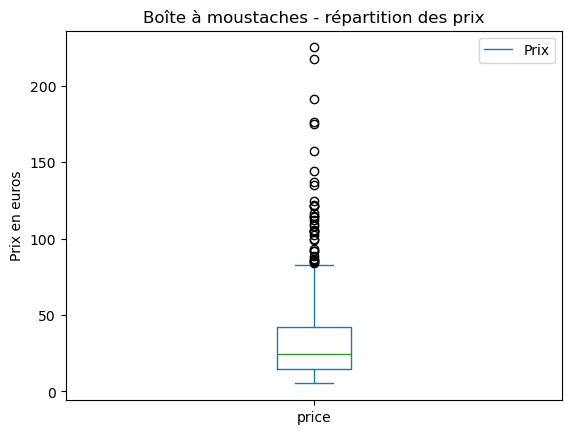

In [422]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt

df_full['price'].plot.box()
plt.title("Boîte à moustaches - répartition des prix")
plt.legend(["Prix"])
plt.ylabel("Prix en euros")
plt.show()

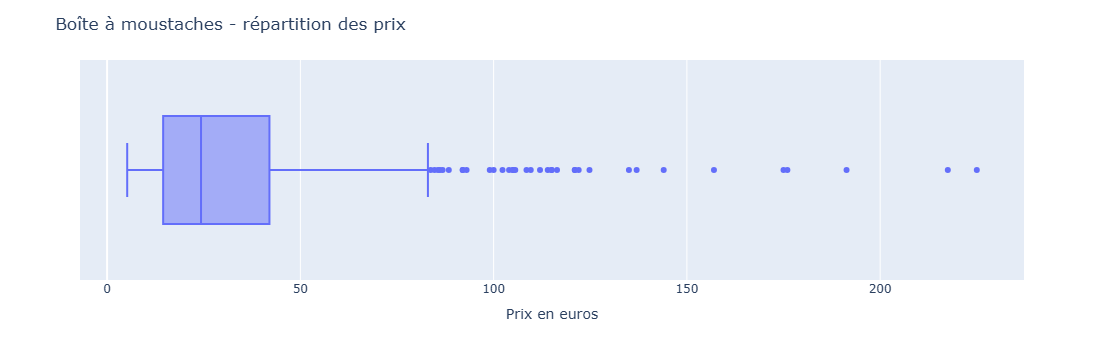

In [424]:
#Autre méthode avec plotly express
fig = px.box(df_full, x="price")
fig.update_layout(title_text="Boîte à moustaches - répartition des prix")
fig.update_xaxes(title_text="Prix en euros")
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [428]:
#Calculer la moyenne du prix

print('Moyenne du prix:',round(df_full["price"].mean(),2))

#Calculer l'écart-type du prix

print('Ecart-type du prix:',round(df_full["price"].std(),2))

#Calculer le Z-score  
#z-score est le nombre d'écarts types par rapport à la moyenne d'un point d'information

zscore = (df_full["price"] - df_full["price"].mean())/df_full["price"].std(ddof=0)
#print(zscore)




Moyenne du prix: 32.28
Ecart-type du prix: 26.6


In [430]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df_outliers = df_full.loc[(df_full["price"] - df_full["price"].mean()) / df_full["price"].std(ddof=0) > 3, "price"]
print(df_outliers)
print('Seuil prix dont z-score est supérieur à 3:',df_outliers.min(),'Euros')
print('nombre articles outliers:',df_outliers.shape[0])
print('proportion outliers:',round(df_outliers.shape[0]*100 /df_full.shape[0],2),'%')


# 116.4

24     176.0
33     157.0
87     115.0
157    115.0
171    137.0
204    217.5
233    114.0
235    122.0
256    124.8
257    135.0
269    191.3
281    121.0
282    121.0
291    116.4
313    175.0
567    225.0
745    144.0
Name: price, dtype: float64
Seuil prix dont z-score est supérieur à 3: 114.0 Euros
nombre articles outliers: 17
proportion outliers: 2.06 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [433]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
descr=df_full.describe()
display(descr)




,total_sales,post_date_gmt,post_modified_gmt,product_id,onsale_web,price,stock_quantity,purchase_price
count,714.000000,714,714,825.000000,825.000000,825.000000,825.000000,825.000000
mean,8.054622,2018-08-22 02:29:08.581232384,2020-06-20 19:51:53.929971968,5162.597576,0.867879,32.277636,21.602424,16.940582
min,0.000000,2018-02-08 11:58:52,2018-02-20 14:19:23,3847.000000,0.000000,5.200000,0.000000,2.740000
25%,5.000000,2018-02-27 19:01:12.500000,2020-06-18 16:32:35,4348.000000,1.000000,14.500000,7.000000,7.590000
50%,8.000000,2018-04-19 12:52:10,2020-08-04 07:30:06.500000,4907.000000,1.000000,24.300000,18.000000,12.710000
75%,11.000000,2019-01-31 13:35:47,2020-08-25 08:32:32,5805.000000,1.000000,42.000000,30.000000,22.020000
max,36.000000,2020-07-20 09:00:00,2020-08-27 16:55:03,7338.000000,1.000000,225.000000,145.000000,137.810000
std,4.161344,NaN,NaN,902.644635,0.338828,26.603196,21.917863,14.561840


In [435]:
#Définissez un seuil pour les articles "outliers" en prix

#1,5 Fois l'ecart interquantile (Max de la boite a moustache) 
seuilmax=(descr.loc['75%', 'price'])+1.5*((descr.loc['75%', 'price'])-(descr.loc['25%', 'price']))
print('Seuil pour les articles outliers en prix:',round(seuilmax,2))

Seuil pour les articles outliers en prix: 83.25


nombre articles outliers: 36
proportion outliers: 4.36 %


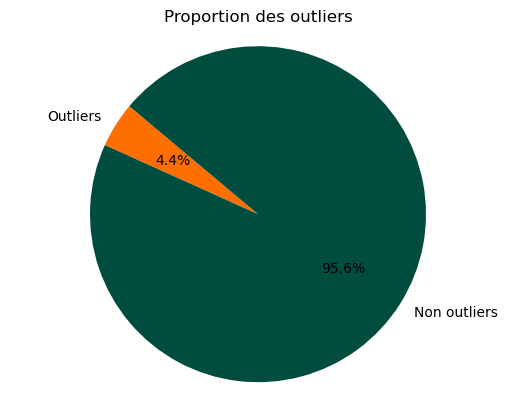

In [437]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

print('nombre articles outliers:',df_full.loc[(df_full["price"] > seuilmax)].shape[0])

print('proportion outliers:',round(df_full.loc[(df_full["price"] > seuilmax)].shape[0]*100 /df_full.shape[0],2),'%')

# le pourcentage est faible! 

proportion_outliers = round(df_full.loc[(df_full["price"] > seuilmax)].shape[0]*100 /df_full.shape[0], 2)
sizes = [proportion_outliers, 100 - proportion_outliers]
labels = ['Outliers', 'Non outliers']
colors = ['#FF6F00', '#004D40']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion des outliers')
plt.show()


In [439]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?

df_Desc_outliers = df_full.loc[(df_full["price"] > seuilmax),["price","post_title"]]
display(df_Desc_outliers.sort_values('price', ascending = False))


#=> oui justifiés car cela correspond a des grands crus ou des vieux millésimes ! => donc chères!

,price,post_title
567,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008
204,217.5,David Duband Charmes-Chambertin Grand Cru 2014
269,191.3,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...
24,176.0,Cognac Frapin VIP XO
313,175.0,Camille Giroud Clos de Vougeot 2016
33,157.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...
745,144.0,NaN
171,137.0,Domaine Des Croix Corton Charlemagne Grand Cru...
257,135.0,Champagne Gosset Célébris Vintage 2007
256,124.8,Domaine Weinbach Gewurztraminer Grand Cru Furs...


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [443]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article

df_full["ca_par_article"]=df_full["total_sales"]*df_full["price"]
#display(df_full.head())

#Calculez la somme de la colonne "ca_par_article"
print('chiffre d''affaire du site web',round(df_full["ca_par_article"].sum(),2),'Euros')
CA_Web=df_full["ca_par_article"].sum()
#Ce résultat correspond au chiffre d'affaire du site web


chiffre daffaire du site web 143680.1 Euros


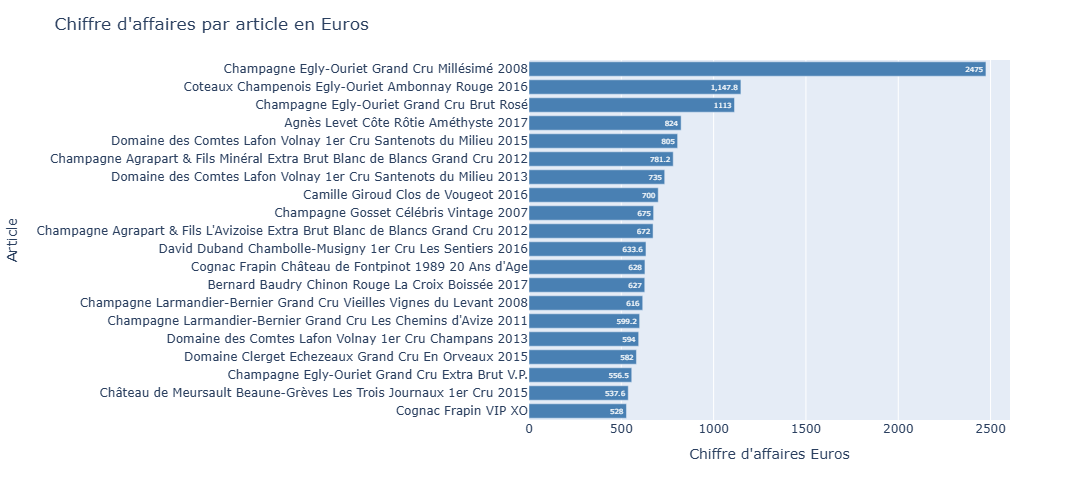

In [445]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge

df_full.sort_values('ca_par_article', ascending = False,inplace=True)

#Réinitialiser l'index du dataset par un reset_index
df_full=df_full.reset_index(drop=True)
#display(df_full)

#Afficher les 20 premier articles en CA

#display(df_merge.head(20))

#Graphique en barre des 20 premiers articles avec plotly express

bar = px.bar(df_full.head(20), y='post_title', x='ca_par_article', color='post_title', color_discrete_sequence=['#4980b3'], orientation='h')
bar.update_layout(title='Chiffre d\'affaires par article en Euros', xaxis_title='Chiffre d\'affaires Euros', yaxis_title='Article', width=1000, height=1000)
bar.update_layout(showlegend=False)  # Supprimer la légende
bar.update_layout(width=1000, height=500)
bar.update_traces(texttemplate='%{x}', textposition='inside')
bar.show()


#champagne / grand Cru / cognac! participent au CA!

nombre d'articles représentant 80% du CA: 434
Proportion du nombre d'articles représentant 80% du CA: 52.61 %


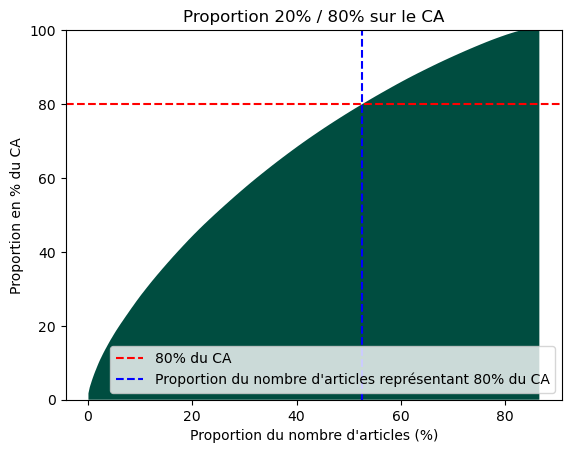

In [446]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_full["ca_part_%"]=df_full["ca_par_article"]*100/CA_Web
#display(df_full)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

df_full['ca_part_cumul'] = df_full['ca_part_%'].cumsum()
    
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA

print("nombre d'articles représentant 80% du CA:",df_full.loc[(df_full['ca_part_cumul'] <= 80)].shape[0])

#434

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

print("Proportion du nombre d'articles représentant 80% du CA:",round(df_full.loc[(df_full['ca_part_cumul'] <= 80)].shape[0]*100/df_full.shape[0],2),"%")

#52.61 %
ca_part_cumul = df_full['ca_part_cumul']
num_articles = len(ca_part_cumul) # Nombre total d'articles
proportion_articles = [round((i+1) / num_articles * 100, 2) for i in range(num_articles)] # Liste des proportions en % du nombre d'articles
plt.stackplot(proportion_articles, ca_part_cumul, colors=['#004D40'])
plt.axhline(y=80, linestyle='--', color='red', label='80% du CA')
plt.axvline(x=round(df_full.loc[(df_full['ca_part_cumul'] <= 80)].shape[0] / num_articles * 100, 2), linestyle='--', color='blue', label='Proportion du nombre d\'articles représentant 80% du CA')
plt.xlabel('Proportion du nombre d\'articles (%)')
plt.ylabel('Proportion en % du CA')
plt.title('Proportion 20% / 80% sur le CA')
plt.ylim(0, 100)
plt.legend()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

Nombre de vente du mois 5751.0


,sku,total_sales,post_date_gmt,product_type,post_title,post_excerpt,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,ca_par_article,ca_part_%,ca_part_cumul
0,16148,36.0,2018-05-03 11:20:05,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,"<div>\n\nUn rosé minéral, fruité et d’une gran...",2020-08-27 07:30:15,https://www.bottle-neck.fr/?post_type=product&...,4867,1,9.9,121,instock,4.86,16148,356.4,0.248051,22.799330
1,15415,27.0,2018-02-15 13:33:42,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,Vin de gourmandise à boire sur la fraîcheur po...,2020-07-11 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,4203,1,9.9,74,instock,5.01,15415,267.3,0.186038,40.239045
2,14864,24.0,2018-02-27 12:33:54,Vin,I Fabbri Chianti Classico Lamole 2017,Un nez typique de petits fruits rouges. Une bo...,2020-08-22 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,4275,1,14.9,62,instock,7.78,14864,357.6,0.248886,21.557543
3,14950,22.0,2018-04-18 09:53:51,Vin,François Baur Pinot Noir Schlittweg 2017,"Un éclat de fruits, de la souplesse, de la ron...",2020-05-06 09:35:01,https://www.bottle-neck.fr/?post_type=product&...,4726,1,12.7,0,outofstock,6.82,14950,279.4,0.194460,36.807324
4,16525,22.0,2018-04-17 07:28:58,Vin,Bernard Baudry Chinon Rouge La Croix Boissée 2017,"Sur ce sol très calcaire, la Croix Boissée dél...",2020-07-31 07:31:39,https://www.bottle-neck.fr/?post_type=product&...,4647,1,28.5,45,instock,14.14,16525,627.0,0.436386,8.224243
5,15325,20.0,2019-03-27 16:59:49,Vin,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: tra...",2020-05-21 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,5826,1,41.2,34,instock,21.71,15325,824.0,0.573496,3.869569
6,14570,20.0,2019-06-28 16:01:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,Nez Séduisant et puissant. Bouquet de fleurs j...,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,6129,1,5.2,68,instock,2.74,14570,104.0,0.072383,95.269839
7,15758,18.0,2018-02-16 09:54:27,Vin,Xavier Frissant Touraine Amboise Chenin Les Pi...,"Un Touraine Amboise fin et élégant, un joli ch...",2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,4220,1,11.6,48,instock,5.75,15758,208.8,0.145323,57.900746
8,15705,17.0,2020-01-03 15:39:53,Vin,Decelle-Villa Chorey-Lès-Beaune 2016,"<span style=""display: inline !important; float...",2020-07-27 09:55:02,https://www.bottle-neck.fr/?post_type=product&...,6569,1,29.0,58,instock,15.28,15705,493.0,0.343123,12.422945
9,15561,17.0,2019-03-15 09:20:59,Vin,Maurel Pays d'Oc Merlot 2018,<div>Robe rouge rubis avec des reflets violine...,2020-08-14 08:55:02,https://www.bottle-neck.fr/?post_type=product&...,5778,1,5.8,44,instock,3.09,15561,98.6,0.068625,96.752438


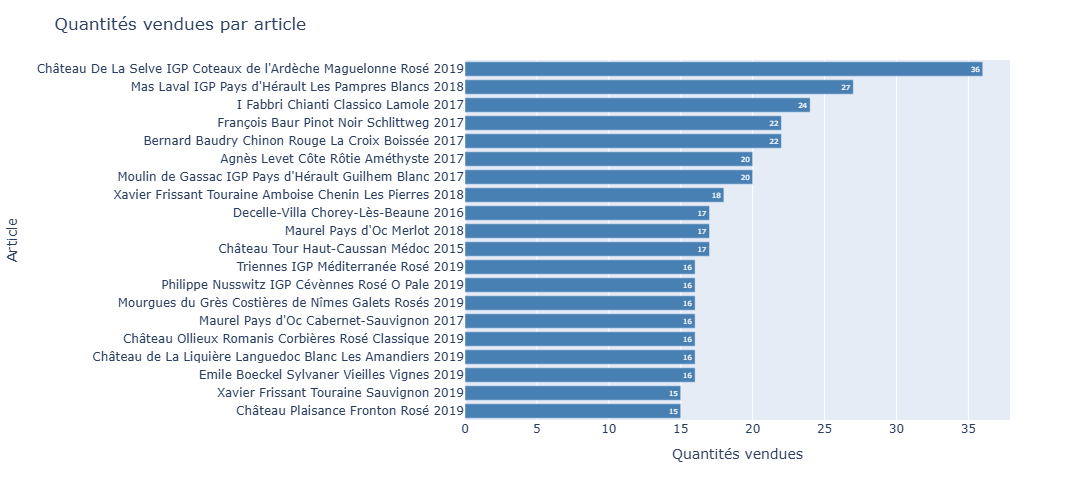

In [450]:
#####################################
# Palmares des articles en quantité #
#####################################

print('Nombre de vente du mois',round(df_full["total_sales"].sum(),2))


#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge

df_full.sort_values('total_sales', ascending = False,inplace=True)

#Réinitialiser l'index du dataset par un reset_index

df_full=df_full.reset_index(drop=True)
#display(df_full)

#Afficher les 20 premier articles en quantité

display(df_full.head(20))

#Graphique en barre des 20 premiers articles avec plotly express
bar = px.bar(df_full.head(20), y='post_title', x='total_sales', color='post_title', color_discrete_sequence=['#4980b3'], orientation='h')
bar.update_layout(title='Quantités vendues par article', xaxis_title='Quantités vendues', yaxis_title='Article', width=1000, height=1000)
bar.update_layout(showlegend=False)  # Supprimer la légende
bar.update_traces(texttemplate='%{x}', textposition='inside')
bar.update_layout(width=1000, height=500)
bar.show()


#les VIN majoritairement partcipent à la vente auantité! pas les champagnes!


nombre d'articles représentant 80% des ventes en quantité: 433
Proportion du nombre d'articles représentant 80% des ventes en quantité: 52.48 %


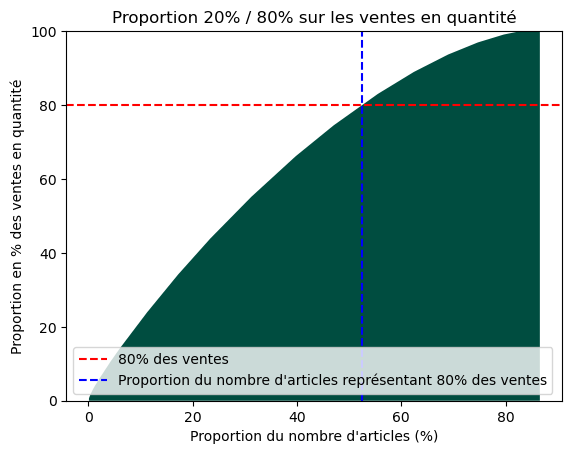

In [451]:
#############################
# Calculer le 20 / 80 en Quantité #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
Sales_Web=df_full["total_sales"].sum()

df_full["Sales_part_%"]=df_full["total_sales"]*100/Sales_Web


#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

df_full['Sales_part_cumul'] = df_full['Sales_part_%'].cumsum()
#display(df_full)

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

print("nombre d'articles représentant 80% des ventes en quantité:",df_full.loc[(df_full['Sales_part_cumul'] <= 80)].shape[0])

#433

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

print("Proportion du nombre d'articles représentant 80% des ventes en quantité:",round(df_full.loc[(df_full['Sales_part_cumul'] <= 80)].shape[0]*100/df_full.shape[0],2),"%")

#52.48 %

proportion_articles = [round((i+1) / df_full.shape[0] * 100, 2) for i in range(df_full.shape[0])]
plt.stackplot(proportion_articles, df_full['Sales_part_cumul'], colors=['#004D40'])
plt.axhline(y=80, linestyle='--', color='red', label='80% des ventes')
plt.axvline(x=round(df_full.loc[(df_full['Sales_part_cumul'] <= 80)].shape[0] * 100 / df_full.shape[0], 2), linestyle='--', color='blue', label='Proportion du nombre d\'articles représentant 80% des ventes')
plt.xlabel('Proportion du nombre d\'articles (%)')
plt.ylabel('Proportion en % des ventes en quantité')
plt.title('Proportion 20% / 80% sur les ventes en quantité')
plt.ylim(0, 100)
plt.legend()
plt.show()




<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

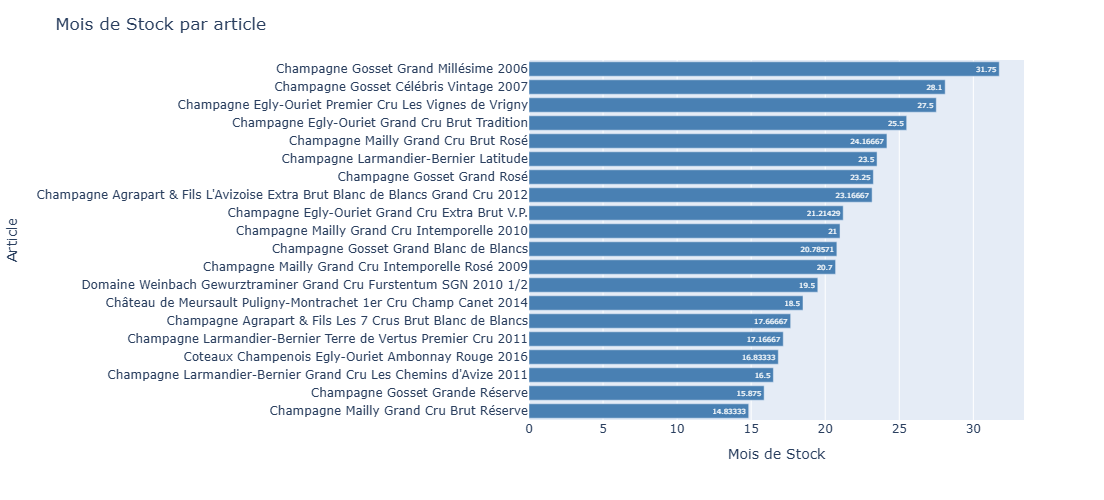

In [455]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 

import numpy as np

#Création de la colonne Rotation de stock
#La rotation de stock est calculée en divisant le coût des marchandises vendues (COGS - Cost of Goods Sold) par la valeur moyenne du stock/2.
#Rotation de stock est le ratio des Coûts des biens vendus (Cost of Goods Sold - COGS) sur la quantité moyenne en stock sur une période donnée.
#calcul du stock moyen = (stock du début de la période considérée + stock de la fin de la période considérée) ÷ 2

#identifier les produits à forte rotation pour lesquels il sera nécessaire de prévoir un réapprovisionnement régulier.
#Une rotation de stock plus élevée indique que les produits se vendent plus rapidement

total_sales = df_full["total_sales"]
purchase_price = df_full["purchase_price"]
stock_quantity = df_full["stock_quantity"]

numerator = total_sales * purchase_price
denominator = ((stock_quantity + total_sales + stock_quantity ) * purchase_price) / 2

df_full["Rotation_Stock"] = np.nan_to_num(numerator / denominator)

#Remplacement des "inf" par 0
#infini =>Division by zero resulting in positive infinity

df_full["nombre_mois_stock"]=1/df_full["Rotation_Stock"]
df_full["nombre_mois_stock"] = df_full["nombre_mois_stock"].replace(np.inf, 0)
#display(df_full)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge

df_full.sort_values('nombre_mois_stock', ascending = False,inplace=True)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

bar = px.bar(df_full.head(20), y='post_title', x='nombre_mois_stock', color='post_title', color_discrete_sequence=['#4980b3'], orientation='h')
bar.update_layout(title='Mois de Stock par article', xaxis_title='Mois de Stock', yaxis_title='Article', width=1000, height=1000)
bar.update_layout(showlegend=False)  # Supprimer la légende
bar.update_traces(texttemplate='%{x}', textposition='inside')
bar.update_layout(width=1000, height=500)
bar.show()

# Les champagnes!! trop de champagne en stock par rapport au vente en quantité! peu de vente de champagne!


In [456]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_full["valo_stock"]=df_full["stock_quantity"]*df_full["purchase_price"]
#display(df_full)
#Calculer la somme de la colonne "Valorisation_stock_euros"

valeur_stock=df_full["valo_stock"].sum()

print("Valorisation_stock_euros:",round(df_full["valo_stock"].sum(),2))
print("Valorisation_stock par rapport au CA %:",round(df_full["valo_stock"].sum()*100/CA_Web,2))
# le stock vaut quasiment 2 fois le chiffre d'affaire! 


Valorisation_stock_euros: 298627.66
Valorisation_stock par rapport au CA %: 207.84


In [459]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
nb_pdt_stock=df_full["stock_quantity"].sum()
print("nombre de produit en stock:",df_full["stock_quantity"].sum())

print("nombre de produit en stock par rapport aux ventes:",round(df_full["stock_quantity"].sum()*100/df_full["total_sales"].sum(),2))
# le nombre de produit en stock est quasiment 3 fois supérieur aux nombre de produit vendu !


nombre de produit en stock: 17822
nombre de produit en stock par rapport aux ventes: 309.89


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [462]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT

df_full["price_HT"]=df_full["price"]/1.2

#Création de la colonne Taux de marge

df_full["Taux_Marge_%"]=(df_full["price_HT"]-df_full["purchase_price"])*100/df_full["purchase_price"]
#display(df_full)

#Afficher le prix minimum de la colonne "taux_marge"

print("Prix minimum taux marge :",round(df_full["Taux_Marge_%"].min(),2),'%')

#Afficher le prix maximum de la colonne "taux_marge"

print("Prix maximum taux marge :",round(df_full["Taux_Marge_%"].max(),2),'%')



Prix minimum taux marge : -86.39 %
Prix maximum taux marge : 91.41 %


In [464]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_full.loc[df_full["Taux_Marge_%"] <0 ,['sku','total_sales','purchase_price','product_type','price','valo_stock','price_HT','Taux_Marge_%']]
#12589 error etiquetage!  purchase_price = 77.48 >>> 10.54  !

#df_full.loc[df_full["Taux_Marge_%"] > 91,:]
#3506 (et14774)


,sku,total_sales,purchase_price,product_type,price,valo_stock,price_HT,Taux_Marge_%
770,NaN,NaN,99.00,NaN,92.00,1782.00,76.666667,-22.558923
820,NaN,NaN,31.20,NaN,31.00,1716.00,25.833333,-17.200855
713,12589,0.0,77.48,Champagne,12.65,7515.56,10.541667,-86.394338
726,NaN,NaN,9.99,NaN,8.30,0.00,6.916667,-30.764097


In [466]:
#création d'un dataframe avec les taux positifs

df_full_pos=df_full[df_full["Taux_Marge_%"] > 0].copy()
#display(df_full_pos)

#Afficher le prix minimum de la colonne "taux_marge"

print("Prix minimum taux marge :",round(df_full_pos["Taux_Marge_%"].min(),2),'%',)
print("Produit correspondant :",df_full_pos.loc[df_full_pos["Taux_Marge_%"] == df_full_pos["Taux_Marge_%"].min(), "post_title"].iloc[0])

#min sku 11258 

#Afficher le prix maximum de la colonne "taux_marge"

print("Prix maximum taux marge :",round(df_full_pos["Taux_Marge_%"].max(),2),'%')
print("Produit correspondant :",df_full_pos.loc[df_full_pos["Taux_Marge_%"] == df_full_pos["Taux_Marge_%"].max(), "post_title"].iloc[0])
#max sku 14774 & 3506


Prix minimum taux marge : 29.5 %
Produit correspondant : Huile d'Olive Extra Vierge Planeta 50cl
Prix maximum taux marge : 91.41 %
Produit correspondant : Cognac Frapin VSOP


product_type
Champagne        39.95
Cognac           82.32
Gin              74.83
Huile d'olive    33.39
Vin              61.50
Whisky           81.74
Name: Taux_Marge_%, dtype: float64

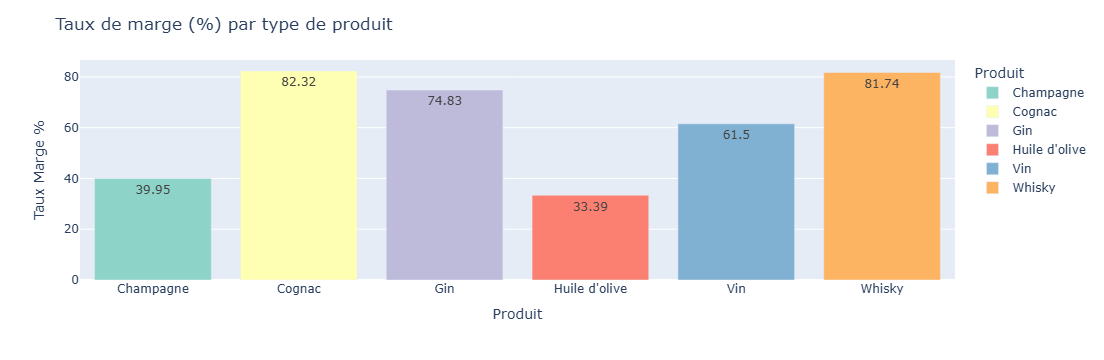

In [468]:
#création d'un dataframe avec le taux de marge moyen par type de produit

df_full_type=round(df_full_pos.groupby(["product_type"])["Taux_Marge_%"].mean(),2)
display(df_full_type)

#Affichage dans un graphique du taux de marge par type de produit

fig = px.bar(df_full_type.reset_index(), x='product_type', y='Taux_Marge_%', color='product_type', color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(title='Taux de marge (%) par type de produit', xaxis_title='Produit', yaxis_title='Taux Marge %')
fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.update_layout(legend_title_text='Produit')  # Changer le nom de la légende
fig.show()

#et finalement champagne marge moyenne ! 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

,stock_quantity,total_sales,price,Taux_Marge_%
stock_quantity,1.000000,0.452609,-0.088397,-0.422190
total_sales,0.452609,1.000000,-0.519752,-0.037125
price,-0.088397,-0.519752,1.000000,-0.035966
Taux_Marge_%,-0.422190,-0.037125,-0.035966,1.000000


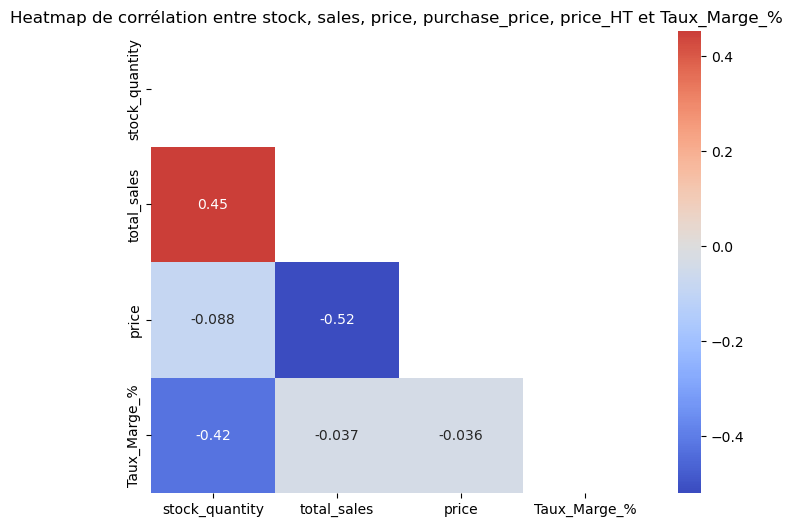

In [471]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn

import seaborn as sns

#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap

# Sélection des colonnes 'stock', 'sales' et 'price' du dataframe
#df_subset = df_full_pos[['stock_quantity', 'total_sales', 'price','purchase_price','price_HT','Taux_Marge_%','ca_part_%','ca_part_cumul','Sales_part_%','Sales_part_cumul','Rotation_Stock','nombre_mois_stock','valo_stock']]
df_subset = df_full_pos[['stock_quantity', 'total_sales', 'price','Taux_Marge_%']]


# Calcul de la matrice de corrélation entre ces variables
correlation_matrix = df_subset.corr()
display(correlation_matrix)

# Création d'un mask pour n'afficher qu'une demi-heatmap : en utilisant la fonction np.triu() qui renvoie une matrice triangulaire supérieure ou égale à True
#et une matrice inférieure à False. Ce "mask" est utilisé pour masquer la moitié inférieure du heatmap.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Création du heatmap de corrélation
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0)
#annot=True pour afficher les valeurs dans les cellules, l'argument cmap='coolwarm' pour spécifier une palette de couleurs
#l'argument center=0 pour centrer le colorbar sur 0.

plt.title('Heatmap de corrélation entre stock, sales, price, purchase_price, price_HT et Taux_Marge_% ')
plt.show()

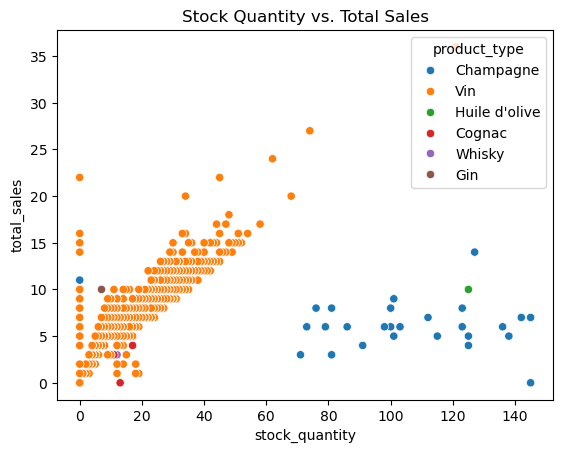

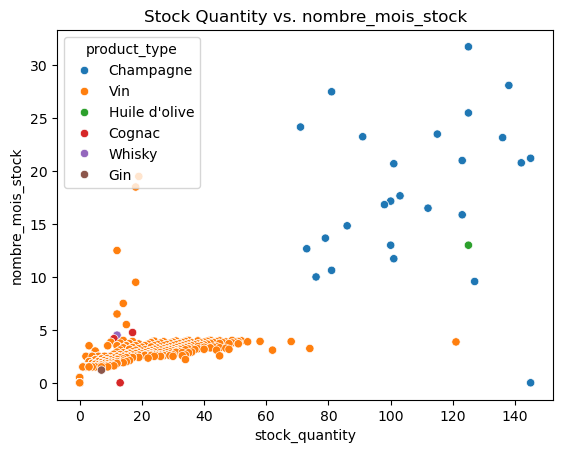

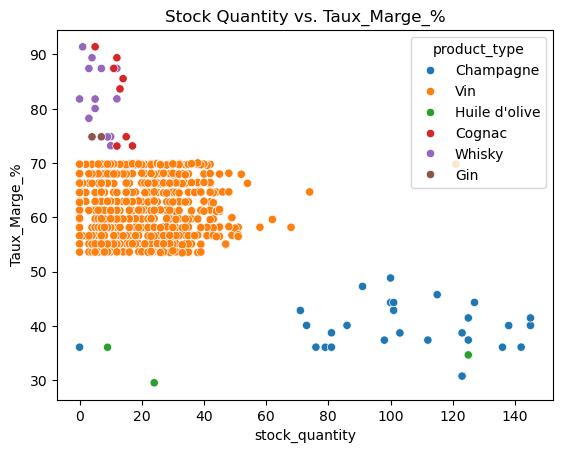

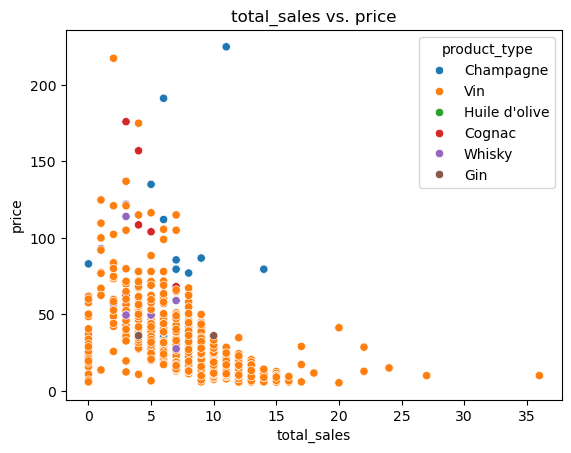

In [473]:
#Que peut-on conclure des correlations ?

#Les stock ne sont pas correlé au prix (-0.1)
#La corrélation entre 'stock_quantity' et 'price' est de -0.08. Cela indique une très faible corrélation négative, ce qui signifie qu'il n'y a pas vraiment de relation évidente entre la quantité de stock et le prix.

#La corrélation entre 'stock_quantity' et 'total_sales' est de 0.45. Cela indique une corrélation positive modérée, ce qui signifie que lorsque la quantité de stock augmente, les ventes ont tendance à augmenter moyennement également.

#stock_quantity et Taux_Marge_% : La corrélation entre ces deux variables est de -0.42. Cela suggère une corrélation négative modérée, indiquant qu'une augmentation de la quantité de stock est généralement associée à une diminution du taux de marge.

#Les corrélations entre 'total_sales' et 'price' 'price_HT' 'Purchase Price' sont autour de -0.5. Cela indique des corrélations négatives modérées, ce qui signifie que lorsque les ventes augmentent, les prix ont tendances à diminuer legèrement.
#et donc quand les prix augemente les ventes diminue legerement 

#Bien sur la corrélation des prix entre eux est fortemenent lié entre eux ! price / purchase_price et price_HT est de 0.99/1.00, ce qui indique une forte corrélation positive. Cela signifie que le prix est fortement lié au prix d'achat et au prix hors taxes.

#ca_part_% et les prix: lorsqu'il y a une augmentation des prix des produits , il y a également tendance à avoir une augmentation de la part du chiffre d'affaires en pourcentage

#'Taux_Marge_%' et  le 'nombre_mois_stock' le taux de marge en pourcentage augmente, le nombre de mois de stock tend à diminuer, et vice versa. En d'autres termes, une augmentation du taux de marge est associée à une diminution du nombre de mois de stock.
#lorsqu'il y a une augmentation du taux de marge en pourcentage, la valeur du stock a tendance à diminuer, et inversement, une diminution du taux de marge est associée à une augmentation de la valeur du stock.

#augmentation des ventes = augmentation du CA! 

sns.scatterplot(data=df_full_pos, x=df_full_pos['stock_quantity'], y=df_full_pos['total_sales'], hue=df_full_pos['product_type'])
plt.title("Stock Quantity vs. Total Sales")
plt.show()

sns.scatterplot(data=df_full_pos, x=df_full_pos['stock_quantity'], y=df_full_pos['nombre_mois_stock'], hue=df_full_pos['product_type'])
plt.title("Stock Quantity vs. nombre_mois_stock")
plt.show()

sns.scatterplot(data=df_full_pos, x=df_full_pos['stock_quantity'], y=df_full_pos['Taux_Marge_%'], hue=df_full_pos['product_type'])
plt.title("Stock Quantity vs. Taux_Marge_%")
plt.show()

sns.scatterplot(data=df_full_pos, x=df_full_pos['total_sales'], y=df_full_pos['price'], hue=df_full_pos['product_type'])
plt.title("total_sales vs. price")
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [476]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  

df_full_pos.to_excel( "df_full_pos.xlsx", sheet_name="export", index=False )